# Run all the experiments for the MRMR paper

Performs all the experiments. 

In [ ]:
import sys
sys.path.append("../..")
from exp_run_config import Config
Config.PROJECTNAME = "WaterBerryFarms"

import pathlib
from pprint import pprint
import gzip as compress
import pickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import wbf_figures
from wbf_simulate import run_nrobot1day

from information_model import StoredObservationIM

In [ ]:
experiment = "mrmr"
lookup = {"mrmr-clustered-1pio-2con": "mrmr", "mrmr-clustered-3lawnmowers": "lawn", "mrmr-clustered-3random": "rwp", "mrmr-unclustered-1pio-2con" : "mrmr",
"mrmr-unclustered-3lawnmowers": "lawn", "mrmr-unclustered-3random": "rwp"}

In [ ]:
# the experiment for this notebook
expall = Config().get_experiment(experiment, "mrmr_all")

for run in expall["allruns"]:
    exp = Config().get_experiment(experiment, run)
    pprint(exp)
    run_nrobot1day(exp)



In [ ]:
# load back all the results 
all_results = {}

for run in expall["allruns"]:
    exp = Config().get_experiment(experiment, run)
    pprint(exp)

    resultsfile = pathlib.Path(exp["data_dir"], "results.pickle")
    if not resultsfile.exists():
        print(f"Results file does not exist:\n{resultsfile}")
        print("Run the notebook Run-1Robot1Day with the same exp/run to create it.")
        raise Exception("Nothing to do.")

    # load the results file
    with compress.open(resultsfile, "rb") as f:
        results = pickle.load(f)    
    all_results[run] = results


In [ ]:
all_results.keys()

### Visualize the replanning process
* for all the mrmr scenarios, for the contractor agents
* for all the replanning points (which are the indexes of the oldplans dictionary)
* create a figure
* visualize the observations to that time with a continuous line
* visualize the rest of the plan from the oldplans

In [23]:
def show_robot_with_plan(expall, scenario, results, robot, observations, oldplan, t):
    """Visualize the plan of the robot at a certain time point"""

    ROBOT_COLORS = ["#E69F00", "#56B4E9", "#009E73"]
    robot_color = ROBOT_COLORS[2]

    filename = f"plans_{scenario}_{robot.name}_{t}"

    fig, ax = plt.subplots(1,1, figsize=(3, 3))
    wbf_figures.show_env_tylcv(results, ax)
    # obs = observations[1:int(t)]
    color = "blue"
    wbf_figures.show_individual_robot_path(results, ax, robot=robot, observations=observations, pathcolor=robot_color, pathwidth=1,  draw_robot=False, from_obs=0, to_obs=int(t))

    # add the plan
    planx = [a["x"] for a in oldplan]
    plany = [a["y"] for a in oldplan]
    ax.add_line(matplotlib.lines.Line2D(planx, plany, color = robot_color, linestyle=":", linewidth=1))

    # position of the robot
    ax.add_patch(matplotlib.patches.Circle((observations[int(t)]["x"], observations[int(t)]["y"]), radius=3, facecolor=robot_color))
    # ax.add_patch(matplotlib.patches.Circle((oldplan[0]["x"], oldplan[0]["y"]), radius=3, facecolor="yellow"))

    ax.set_title(f"{robot.name} at t={int(t)}")
    filepath = pathlib.Path(expall.data_dir(), f"{filename}.pdf")
    plt.savefig(filepath)
    print(f"Done saving to {filepath}")

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 23, 24, 25, 26, 27, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closed glyph list over 'MATH': 19 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'two', 'ze

con-1
0.0


INFO:fontTools.subset:GSUB subsetted
INFO:fontTools.subset:name subsetting not needed
INFO:fontTools.subset:glyf subsetted
INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:OS/2 CodePage ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonm

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-clustered-1pio-2con_con-1_0.0.pdf
211.0


INFO:fontTools.subset:GSUB subsetted
INFO:fontTools.subset:name subsetting not needed
INFO:fontTools.subset:glyf subsetted
INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:OS/2 CodePage ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonm

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-clustered-1pio-2con_con-1_211.0.pdf
271.0


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 20 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closed glyph list over 'MATH': 20 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-clustered-1pio-2con_con-1_271.0.pdf
377.0


INFO:fontTools.subset:GSUB subsetted
INFO:fontTools.subset:name subsetting not needed
INFO:fontTools.subset:glyf subsetted
INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:OS/2 CodePage ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonm

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-clustered-1pio-2con_con-1_377.0.pdf
414.0


INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned


Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-clustered-1pio-2con_con-1_414.0.pdf
con-2
0.0


INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 23, 24, 25, 26, 27, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closed glyph list over 'MATH': 19 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 23, 24, 25, 26, 27, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closing glyph list over 'GSUB': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-clustered-1pio-2con_con-2_0.0.pdf
439.0


INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 23, 24, 25, 26, 27, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closed glyph list over 'MATH': 19 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', '

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-clustered-1pio-2con_con-2_439.0.pdf
485.0


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 23, 24, 25, 26, 27, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closed glyph list over 'MATH': 19 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'two', 'ze

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-clustered-1pio-2con_con-2_485.0.pdf
646.0


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 23, 24, 25, 26, 27, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closed glyph list over 'MATH': 19 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'two', 'ze

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-clustered-1pio-2con_con-2_646.0.pdf
827.0


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned


Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-clustered-1pio-2con_con-2_827.0.pdf
864.0


INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 23, 24, 25, 26, 27, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closed glyph list over 'MATH': 19 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 23, 24, 25, 26, 27, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closing glyph list over 'GSUB': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-clustered-1pio-2con_con-2_864.0.pdf
con-1
0.0


INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 20 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closed glyph list over 'MATH': 20 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-1_0.0.pdf
235.0


INFO:fontTools.subset:GSUB subsetted
INFO:fontTools.subset:name subsetting not needed
INFO:fontTools.subset:glyf subsetted
INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:OS/2 CodePage ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonm

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-1_235.0.pdf
266.0


INFO:fontTools.subset:GSUB subsetted
INFO:fontTools.subset:name subsetting not needed
INFO:fontTools.subset:glyf subsetted
INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:OS/2 CodePage ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 20 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonm

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-1_266.0.pdf
273.0


INFO:fontTools.subset:GSUB subsetted
INFO:fontTools.subset:name subsetting not needed
INFO:fontTools.subset:glyf subsetted
INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:OS/2 CodePage ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 20 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonm

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-1_273.0.pdf
362.0


INFO:fontTools.subset:Closed glyph list over 'GSUB': 20 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closing glyph list over 'glyf': 20 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closed glyph list over 'glyf': 20 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 's

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-1_362.0.pdf
385.0


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 21 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closed glyph list over 'MATH': 21 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'seven'

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-1_385.0.pdf
439.0


INFO:fontTools.subset:GPOS subsetted
INFO:fontTools.subset:GSUB subsetted
INFO:fontTools.subset:name subsetting not needed
INFO:fontTools.subset:glyf subsetted
INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:OS/2 CodePage ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 20 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal',

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-1_439.0.pdf
549.0


INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:OS/2 CodePage ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 20 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-1_549.0.pdf
595.0


INFO:fontTools.subset:GPOS subsetted
INFO:fontTools.subset:GSUB subsetted
INFO:fontTools.subset:name subsetting not needed
INFO:fontTools.subset:glyf subsetted
INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:OS/2 CodePage ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
C:\Users\lboloni\AppData\Local\Temp\ipykernel_150288\1077275274.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1, figsize=(3, 3))
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dro

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-1_595.0.pdf
768.0


INFO:fontTools.subset:hmtx subsetted
INFO:fontTools.subset:cmap subsetted
INFO:fontTools.subset:fpgm subsetting not needed
INFO:fontTools.subset:prep subsetting not needed
INFO:fontTools.subset:cvt  subsetting not needed
INFO:fontTools.subset:loca subsetting not needed
INFO:fontTools.subset:post subsetted
INFO:fontTools.subset:gasp subsetting not needed
INFO:fontTools.subset:MATH subsetted
INFO:fontTools.subset:GDEF subsetted
INFO:fontTools.subset:GPOS subsetted
INFO:fontTools.subset:GSUB subsetted
INFO:fontTools.subset:name subsetting not needed
INFO:fontTools.subset:glyf subsetted
INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:OS/2 CodePage ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dr

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-1_768.0.pdf
con-2
0.0


INFO:fontTools.subset:post subsetted
INFO:fontTools.subset:gasp subsetting not needed
INFO:fontTools.subset:MATH subsetted
INFO:fontTools.subset:GDEF subsetted
INFO:fontTools.subset:GPOS subsetted
INFO:fontTools.subset:GSUB subsetted
INFO:fontTools.subset:name subsetting not needed
INFO:fontTools.subset:glyf subsetted
INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:OS/2 CodePage ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to s

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-2_0.0.pdf
802.0


INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 20 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'seven', 'six', 'space', 't', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 19, 20, 21, 23, 24, 25, 26, 27, 28, 32, 68, 70, 81, 82, 87]
INFO:fontTools.subset:Closed glyph list over 'MATH': 20 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nine', 'nonmarkingreturn'

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-2_802.0.pdf
829.0


INFO:fontTools.subset:GSUB subsetted
INFO:fontTools.subset:name subsetting not needed
INFO:fontTools.subset:glyf subsetted
INFO:fontTools.subset:head pruned
INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:OS/2 CodePage ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 20 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'a', 'c', 'eight', 'equal', 'five', 'four', 'hyphen', 'n', 'nine

Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-2_829.0.pdf
859.0


INFO:fontTools.subset:OS/2 Unicode ranges pruned: [0]
INFO:fontTools.subset:OS/2 CodePage ranges pruned: [0]
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:GDEF pruned
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:name pruned


Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-unclustered-1pio-2con_con-2_859.0.pdf


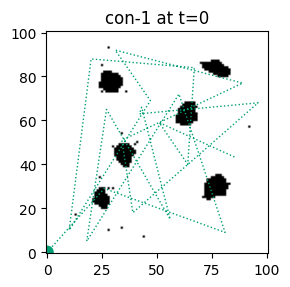

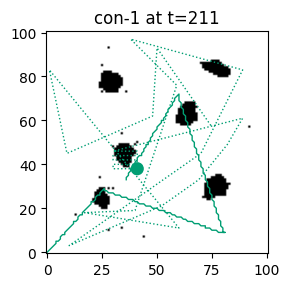

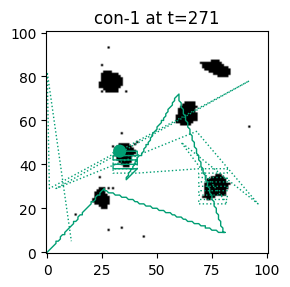

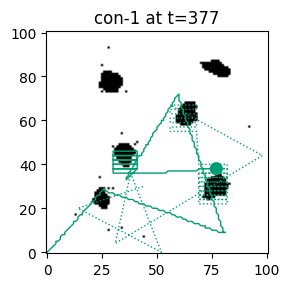

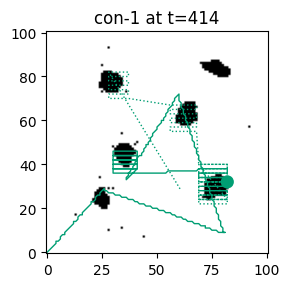

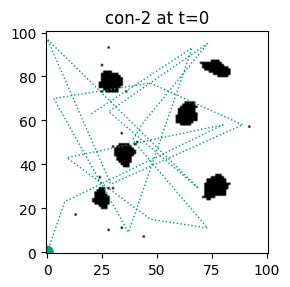

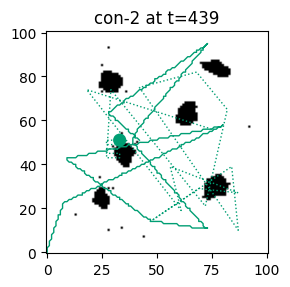

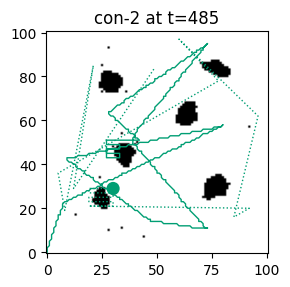

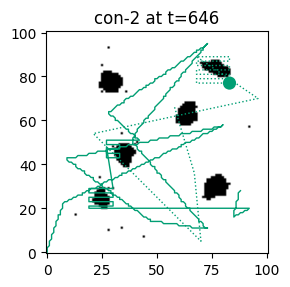

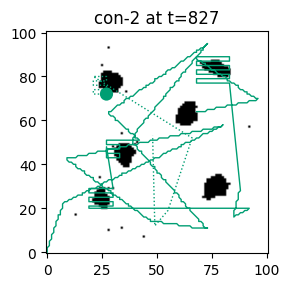

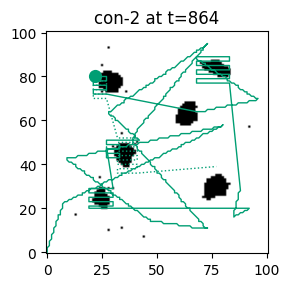

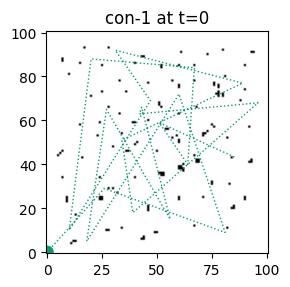

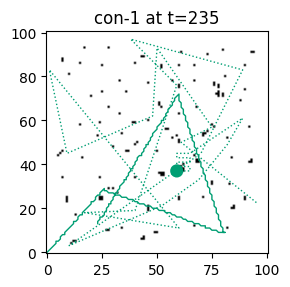

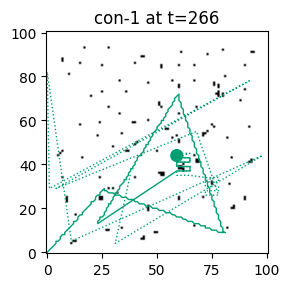

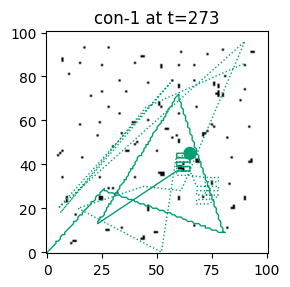

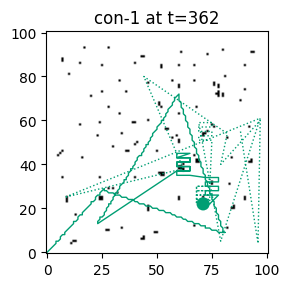

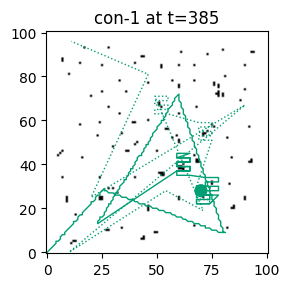

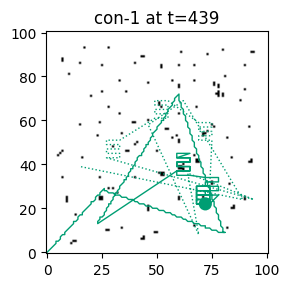

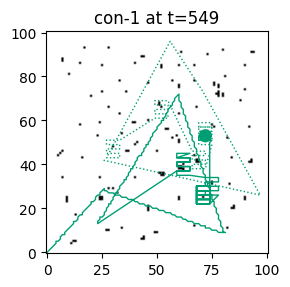

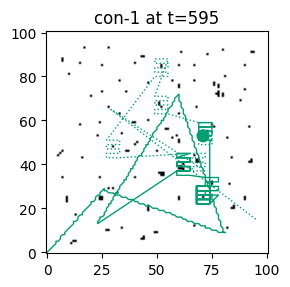

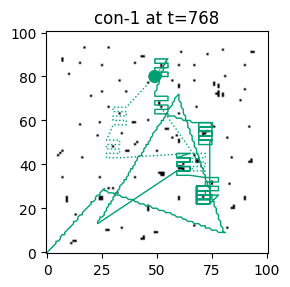

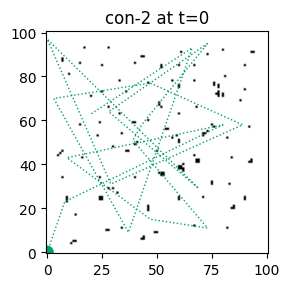

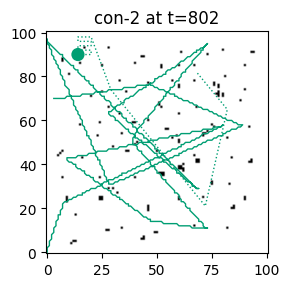

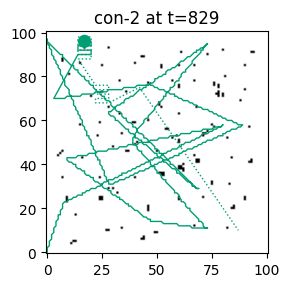

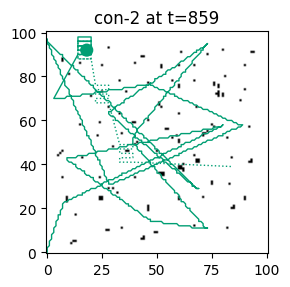

In [24]:
for scenario in all_results:
    if "1pio" not in scenario: continue
    results = all_results[scenario]
    for i, robot in enumerate(results["robots"]):
        if "con" in robot.name:
            print(robot.name)
            # FIXME: I think that the problem here is that I won't have access to the policy here, so I will need to store the old plans somewhere else... maybe in the robot...?
            observations = [o[i] for o in results["observations"]]
            oldplans = robot.oldplans
            for t in oldplans:
                print(t)
                oldplan = oldplans[t]
                show_robot_with_plan(expall, scenario, results, robot, observations, oldplan, t)

### Visualize detection paths 
* for all running scenarios
* create a graph for the visualization of the paths, with the visualize the detections
* create a bargraph with the number of detection points for each of them
* FIXME: maybe also visualize the money for the mrmr agents

In [ ]:
def show_robot_trajectories_and_detections(expall, name, results, robot_colors):

    fig, ax = plt.subplots(1,1, figsize=(3, 3))
    wbf_figures.show_env_tylcv(results, ax)
    ax.set_title(lookup[name])
    custom_lines = []
    labels = []

    for i, robot in enumerate(results["robots"]):
        color = robot_colors[i % len(results["robots"])]
        observations = [o[i] for o in results["observations"]]
        wbf_figures.show_individual_robot_path(results, ax, robot=robot, observations=observations, pathcolor=color, draw_robot=False)
        wbf_figures.show_individual_robot_detections(results, ax, robotno=i, detection_color=color, radius=0.5)
        # adding to the legend
        custom_lines.append(matplotlib.lines.Line2D([0], [0], color=color, lw=2))
        labels.append(robot.name)


    # Add both automatic and manual entries to the legend
    ax.legend(handles=[*custom_lines],
            labels=labels)    

    plt.savefig(pathlib.Path(expall.data_dir(), f"detections-map-{name}.pdf"))

In [ ]:
def count_detections(results, robotno, field = "TYLCV"):
    """Returns the number of detections for the specified robot, adapted from wbf_figures.show_detections"""
    obs = np.array(results["observations"])[:, robotno]
    detections = [[a[StoredObservationIM.X], a[StoredObservationIM.Y]] for a in obs if a[field][StoredObservationIM.VALUE] == 0.0]
    return len(detections)

In [ ]:
def show_agentwise_detections(expall, name, results, robot_colors):    
    fig, ax = plt.subplots(1,1, figsize=(3, 3))
    ax.set_title(lookup[name])
    total = 0
    for i, robot in enumerate(results["robots"]):
        detections = count_detections(results, i)
        total += detections
        br = ax.bar(robot.name, detections, color=robot_colors[i])
    ax.bar("Total", total, color="gray")
    plt.savefig(pathlib.Path(expall.data_dir(), f"detections-bar-{name}.pdf"))

In [ ]:
#ROBOT_COLORS = ["red", "blue", "green"]
ROBOT_COLORS = ["#E69F00", "#56B4E9", "#009E73"]
for scenario in all_results:
    results = all_results[scenario]
    name = scenario
    show_robot_trajectories_and_detections(expall, name, results, robot_colors=ROBOT_COLORS)    
    show_agentwise_detections(expall, name, results, robot_colors = ROBOT_COLORS)

### Overall pickings comparison graphs 
* compare the unclustered and clustered cases 
* create comparison graphs

In [ ]:
name_colors = ["#CC6666", "#9999CC", "#66CC99"]

In [ ]:
def show_comparative_detections(expall, name, values):    
    fig, ax = plt.subplots(1,1, figsize=(3, 3))
    for i, policyname in enumerate(values):
        br = ax.bar(lookup[policyname], values[policyname], color=name_colors[i])
    plt.savefig(pathlib.Path(expall.data_dir(), f"comparative-bar-{name}.pdf"))

In [ ]:
for group in ["clustered-runs", "unclustered-runs"]:
    values = {}
    for scenario in expall[group]:
        results = all_results[scenario]
        total = 0
        for i, robot in enumerate(results["robots"]):
            detections = count_detections(results, i)
            total += detections
        values[scenario] = total
    show_comparative_detections(expall, f"comparative-{group}", values)